In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(f'/Users/ryanm/Desktop/df.csv')
print(df.shape)
df.head(25)

(3214874, 14)


,user_id,order_number,product_name,order_id,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,aisle,department
0,1,1,XL Pick-A-Size Paper Towel Rolls,2539329,2,8,11.0,26405,5,0,54,17,paper goods,household
1,1,2,Aged White Cheddar Popcorn,2398795,3,7,15.0,26088,6,1,23,19,popcorn jerky,snacks
2,1,3,Creamy Almond Butter,473747,3,12,21.0,30450,5,1,88,13,spreads,pantry
3,1,4,XL Pick-A-Size Paper Towel Rolls,2254736,4,7,29.0,26405,5,1,54,17,paper goods,household
4,1,5,Bartlett Pears,431534,4,15,28.0,41787,8,1,24,4,fresh fruits,produce
5,1,6,Organic String Cheese,3367565,2,7,19.0,25133,4,1,21,16,packaged cheese,dairy eggs
6,1,7,Organic String Cheese,550135,1,9,20.0,25133,5,1,21,16,packaged cheese,dairy eggs
7,1,8,Organic Half & Half,3108588,1,14,14.0,49235,6,1,53,16,cream,dairy eggs
8,1,9,Organic Half & Half,2295261,1,16,0.0,49235,6,1,53,16,cream,dairy eggs
9,1,10,Zero Calorie Cola,2550362,4,8,30.0,46149,9,1,77,7,soft drinks,beverages


In [3]:
#Okay time to look at what relationships exist in our data.
# First let's convert our three text columns into cat codes and new columns so we can use them better.
df['product_name'] = df['product_name'].astype('category')
df['product_name_code'] = df['product_name'].cat.codes

df['aisle'] = df['aisle'].astype('category')
df['aisle_code'] = df['aisle'].cat.codes

df['department'] = df['department'].astype('category')
df['department_code'] = df['department'].cat.codes

df.head(10)

,user_id,order_number,product_name,order_id,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,aisle,department,product_name_code,aisle_code,department_code
0,1,1,XL Pick-A-Size Paper Towel Rolls,2539329,2,8,11.0,26405,5,0,54,17,paper goods,household,31683,99,11
1,1,2,Aged White Cheddar Popcorn,2398795,3,7,15.0,26088,6,1,23,19,popcorn jerky,snacks,980,103,20
2,1,3,Creamy Almond Butter,473747,3,12,21.0,30450,5,1,88,13,spreads,pantry,7124,124,16
3,1,4,XL Pick-A-Size Paper Towel Rolls,2254736,4,7,29.0,26405,5,1,54,17,paper goods,household,31683,99,11
4,1,5,Bartlett Pears,431534,4,15,28.0,41787,8,1,24,4,fresh fruits,produce,2419,50,19
5,1,6,Organic String Cheese,3367565,2,7,19.0,25133,4,1,21,16,packaged cheese,dairy eggs,20620,93,7
6,1,7,Organic String Cheese,550135,1,9,20.0,25133,5,1,21,16,packaged cheese,dairy eggs,20620,93,7
7,1,8,Organic Half & Half,3108588,1,14,14.0,49235,6,1,53,16,cream,dairy eggs,19411,33,7
8,1,9,Organic Half & Half,2295261,1,16,0.0,49235,6,1,53,16,cream,dairy eggs,19411,33,7
9,1,10,Zero Calorie Cola,2550362,4,8,30.0,46149,9,1,77,7,soft drinks,beverages,31862,117,3


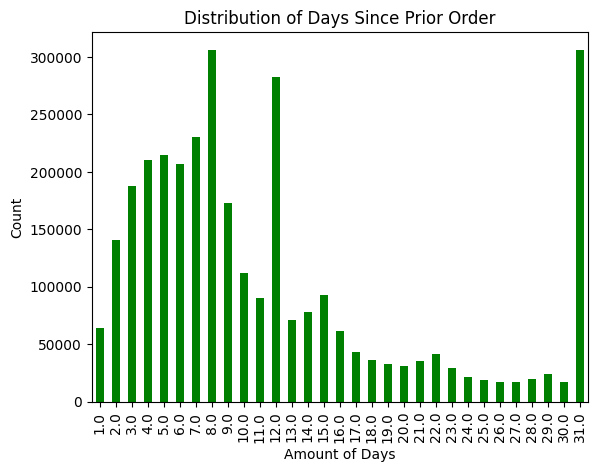

In [4]:
# Since we imputed the days_since_prior_order lets's see how that looks throughout the dataset.
if df['days_since_prior_order'].min() == 0:
    df['days_since_prior_order'] += 1

df['days_since_prior_order'].value_counts().reindex(sorted(df['days_since_prior_order'].unique())).plot(kind='bar', color='green')
plt.xlabel('Amount of Days')
plt.ylabel('Count')
plt.title('Distribution of Days Since Prior Order')
plt.show()
# So here we can see 3 clear values that stick out (8, 12, and 31), as well as a trend showing that most customers purchased again within the first week.

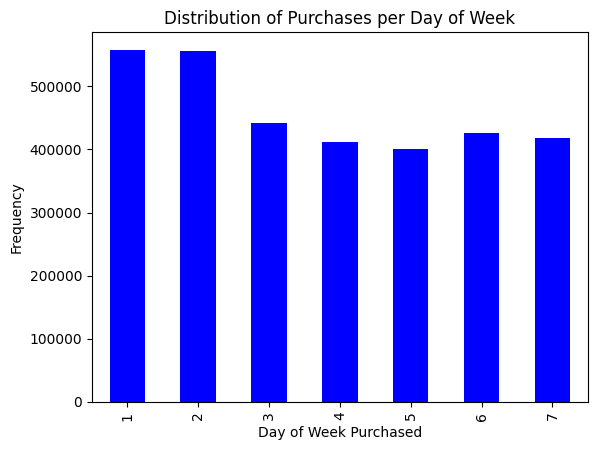

In [5]:
if df['order_dow'].min() == 0:
    df['order_dow'] += 1

df['order_dow'].value_counts().reindex(sorted(df['order_dow'].unique())).plot(kind = 'bar', color = 'blue')
plt.xlabel('Day of Week Purchased')
plt.ylabel('Frequency')
plt.title('Distribution of Purchases per Day of Week')
plt.show()
# Interesting to see the most orders are placed on Monday and Tuesday of the week.


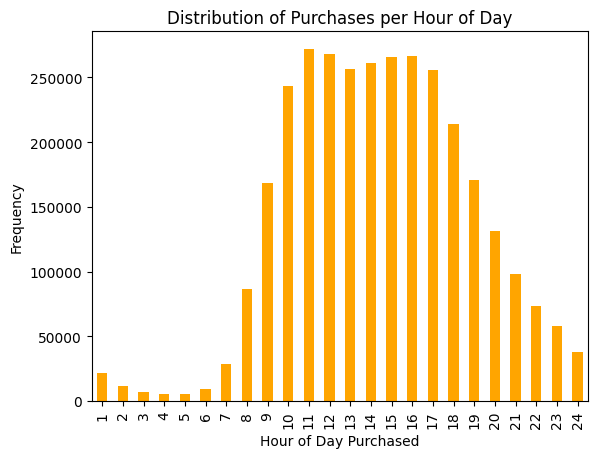

In [6]:
if df['order_hour_of_day'].min() == 0:
    df['order_hour_of_day'] += 1

df['order_hour_of_day'].value_counts().reindex(sorted(df['order_hour_of_day'].unique())).plot(kind = 'bar', color = 'orange')
plt.xlabel('Hour of Day Purchased')
plt.ylabel('Frequency')
plt.title('Distribution of Purchases per Hour of Day')
plt.show()# There's a noticeable pattern in purchase activity between 11am and 4pm.

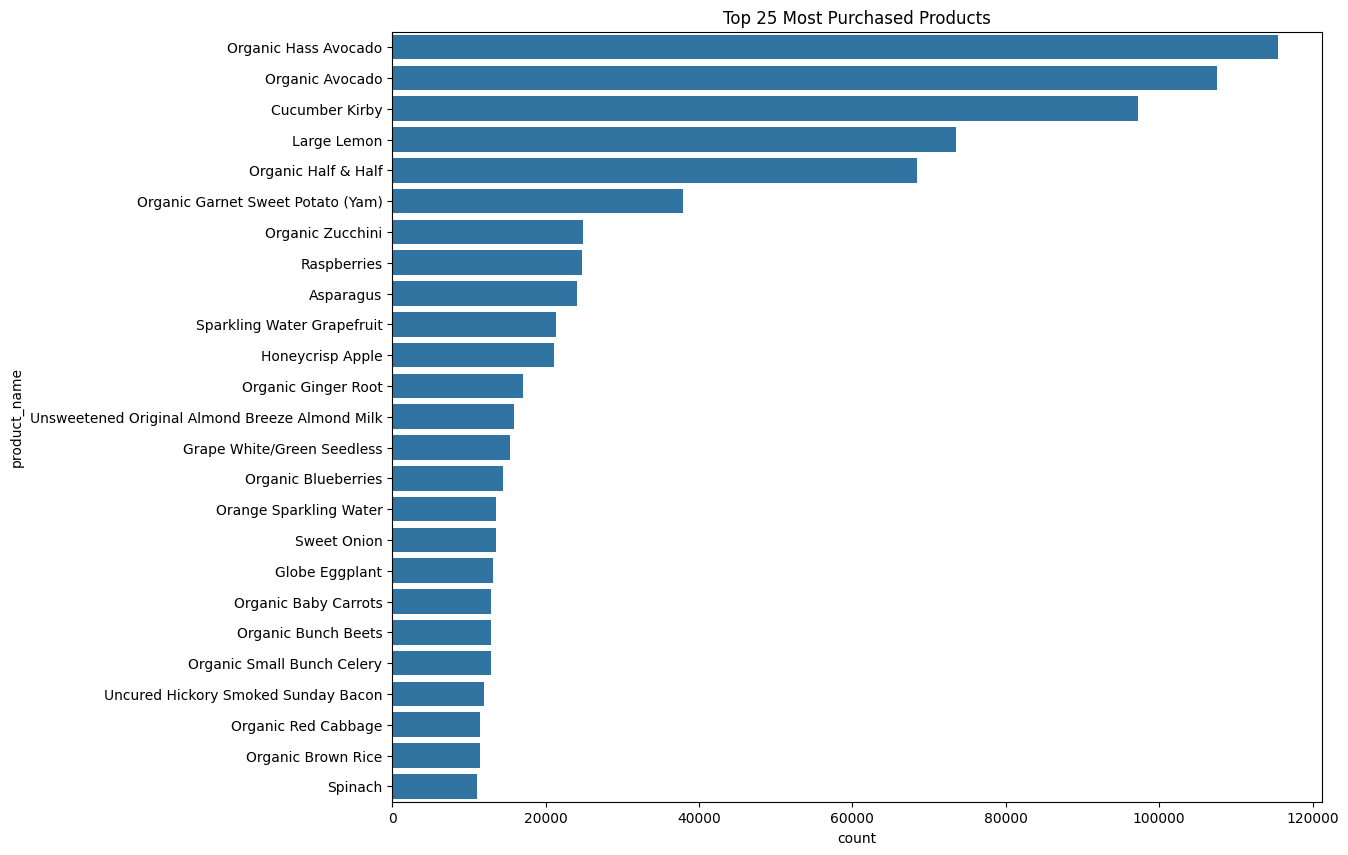

In [7]:
top_25_products = df['product_name'].value_counts().head(25)
top_25_p = df[df['product_name'].isin(top_25_products.index)]

plt.figure(figsize = (12,10))
sns.countplot(y = 'product_name', data = top_25_p, order = top_25_products.index)
plt.title('Top 25 Most Purchased Products')
plt.show()
# The top 5 products take up the majority here, with both varieties of the avocado taking the top 2 spots.

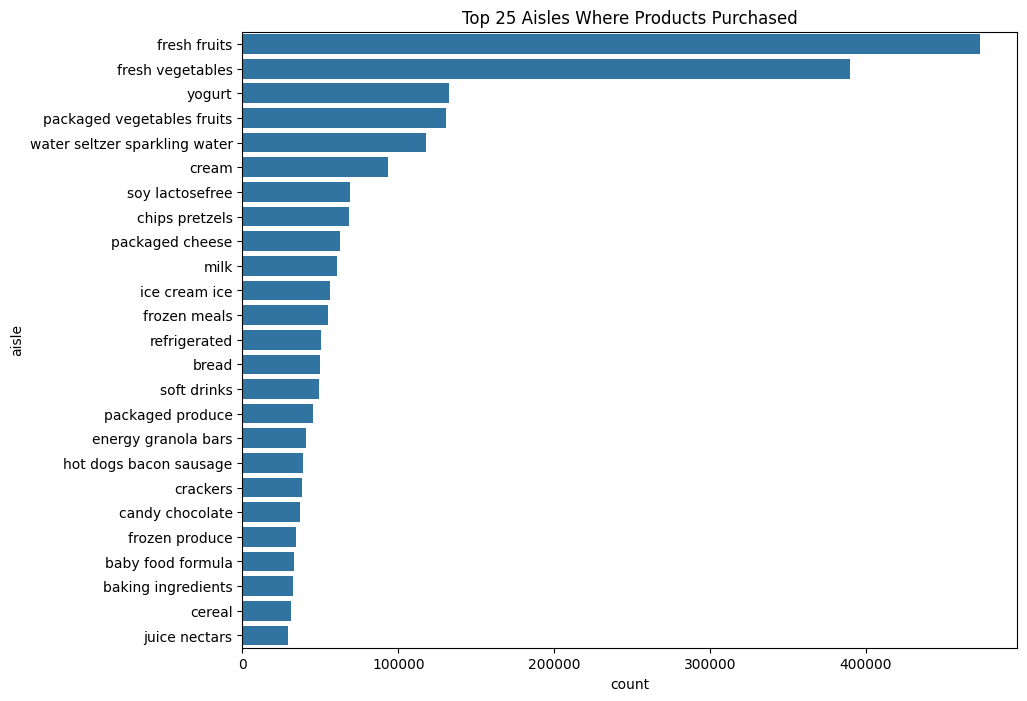

In [8]:
# Let's do the same for aisle and department
top_25_aisles = df['aisle'].value_counts().head(25)
top_25_a = df[df['aisle'].isin(top_25_aisles.index)]

plt.figure(figsize = (10,8))
sns.countplot(y = 'aisle', data = top_25_a, order = top_25_aisles.index)
plt.title('Top 25 Aisles Where Products Purchased')
plt.show()
# Fresh fruits and fresh vegetables have a clear trend here.

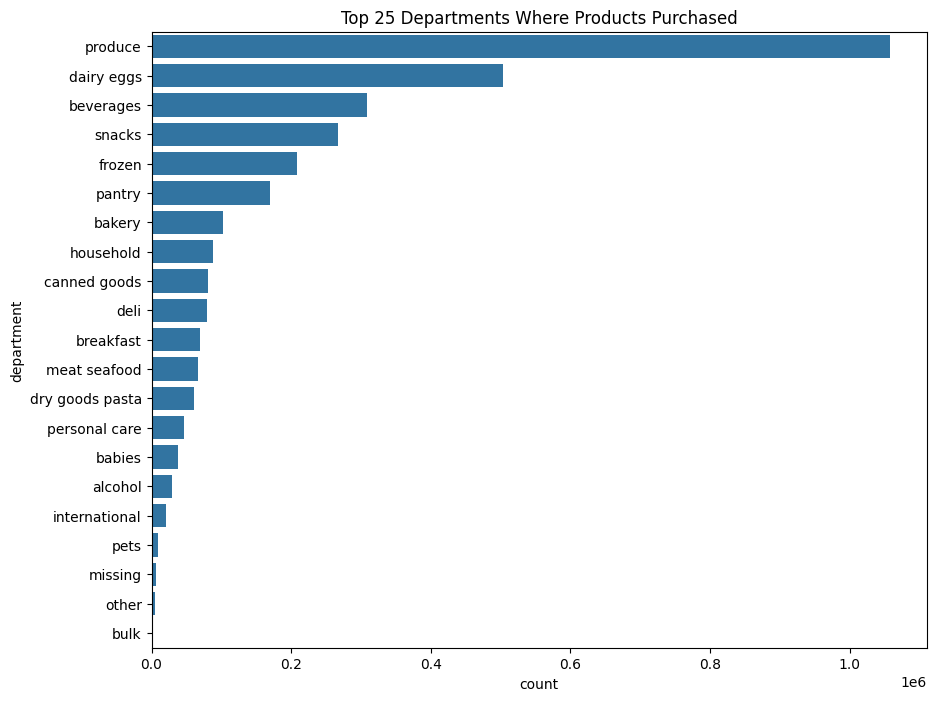

In [9]:
top_25_departments = df['department'].value_counts().head(25)
top_25_d = df[df['department'].isin(top_25_departments.index)]

plt.figure(figsize = (10,8))
sns.countplot(y = 'department', data = top_25_d, order = top_25_departments.index)
plt.title('Top 25 Departments Where Products Purchased')
plt.show()
# Looks like produce has a clear margin, while dairy eggs is second.

In [19]:
# Let's look at the relationships between product_name and the reordered columns.
df_sample = df.sample(n = 10000, random_state = 42)
top_products_codes = df[df['product_name'].isin(df['product_name'].value_counts().nlargest(5).index)][['product_name', 'product_name_code']].drop_duplicates()
top_products_codes.head(10)
# We will need this table as a reference for the next few plots we will be making, so we can refer back to the product_name from the code.

,product_name,product_name_code
7,Organic Half & Half,19411
11,Organic Avocado,18350
15,Organic Hass Avocado,19425
26,Cucumber Kirby,7416
378,Large Lemon,14265


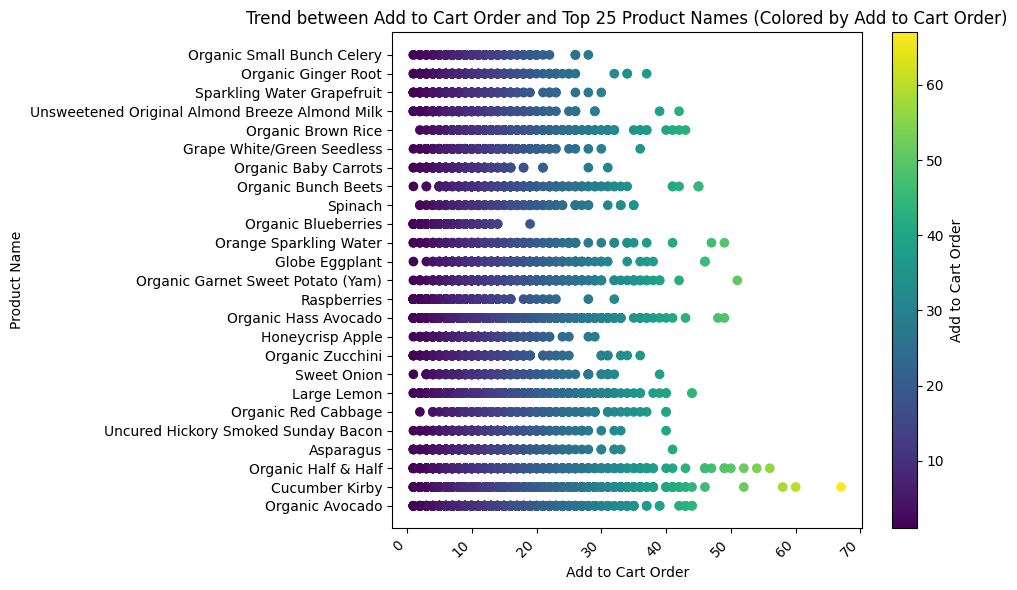

In [32]:
top_product_names = df['product_name'].value_counts().nlargest(25).index.tolist()

# Filter the DataFrame to include only rows with the top 25 product names
df_top_products = df[df['product_name'].isin(top_product_names)]

# Sample a subset of the data for plotting (adjust the sample size as needed)
df_sample_prod = df_top_products.sample(n=10000, random_state=42)

# Create a scatter plot with a colormap based on 'add_to_cart_order'
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
scatter = plt.scatter(df_sample_prod['add_to_cart_order'], df_sample_prod['product_name'], c=df_sample_prod['add_to_cart_order'], cmap='viridis')
plt.colorbar(scatter, label='Add to Cart Order')  # Add colorbar with label
plt.xlabel('Add to Cart Order')
plt.ylabel('Product Name')
plt.title('Trend between Add to Cart Order and Top 25 Product Names (Colored by Add to Cart Order)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [ ]:
main_path = r'C:/Users/ryanm/Desktop/df.csv'

df.to_csv(main_path, index = False)